# Page View Time Series Visualizer

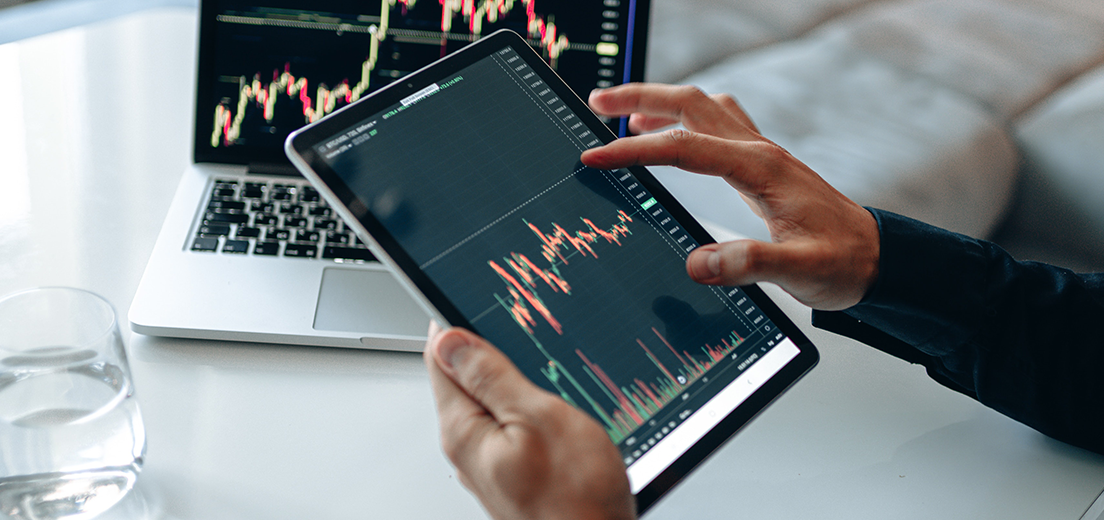


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
df = pd.read_excel('/Users/annaborodina/Library/Containers/com.microsoft.Excel/Data/Downloads/fcc-forum-pageviews.xlsx') 
df_dateindex = df.set_index('date')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [32]:
df_filtered = df_dateindex[(df_dateindex['value'] > df_dateindex['value'].quantile(0.025)) & (df_dateindex['value'] < df_dateindex['value'].quantile(0.975))]

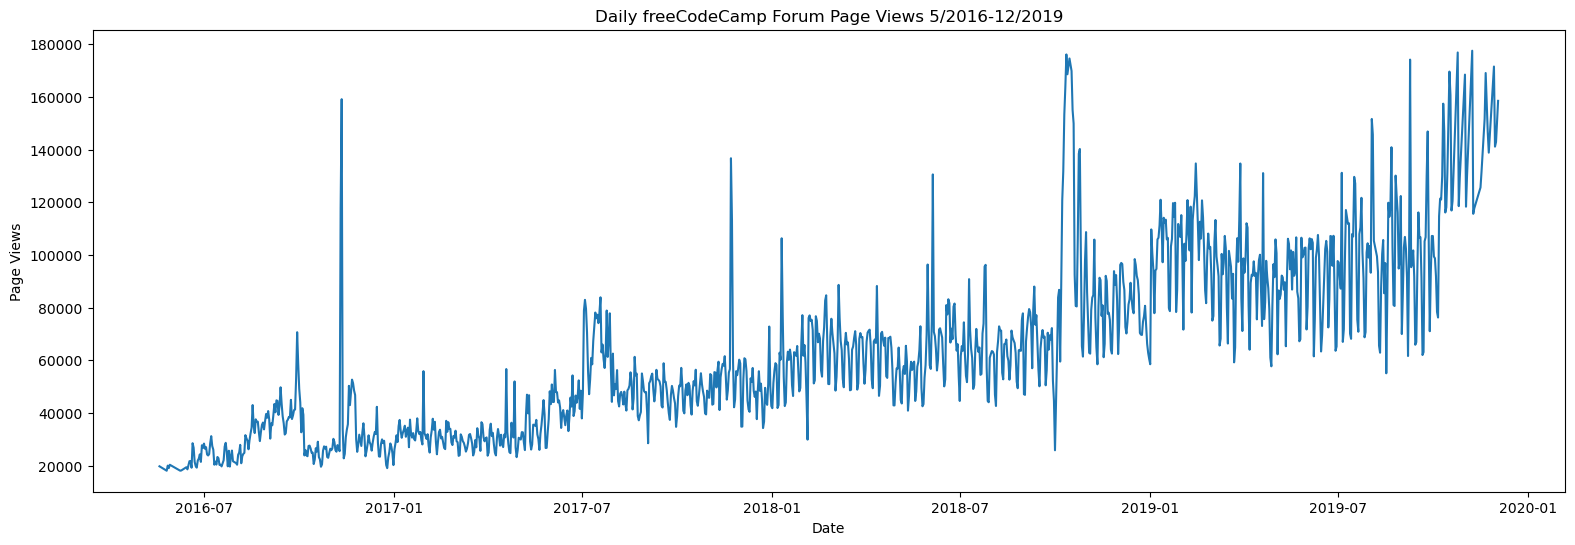

In [33]:
plt.figure(figsize = (19, 6))
line_plot = plt.plot(df_filtered)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

In [39]:
def draw_bar_plot():
    df_bar = df.copy()
    df['date'] = pd.to_datetime(df.date, format = '%d-%m-%Y')
    df['year'] = df['date'].dt.year 
    df['month'] = df['date'].dt.month 
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,11242.695652,19124.366667,23314.225806,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,112592.000000,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,162402.600000,100804.451613,117991.032258,97268.833333,150862.709677,181026.700000,173870.333333


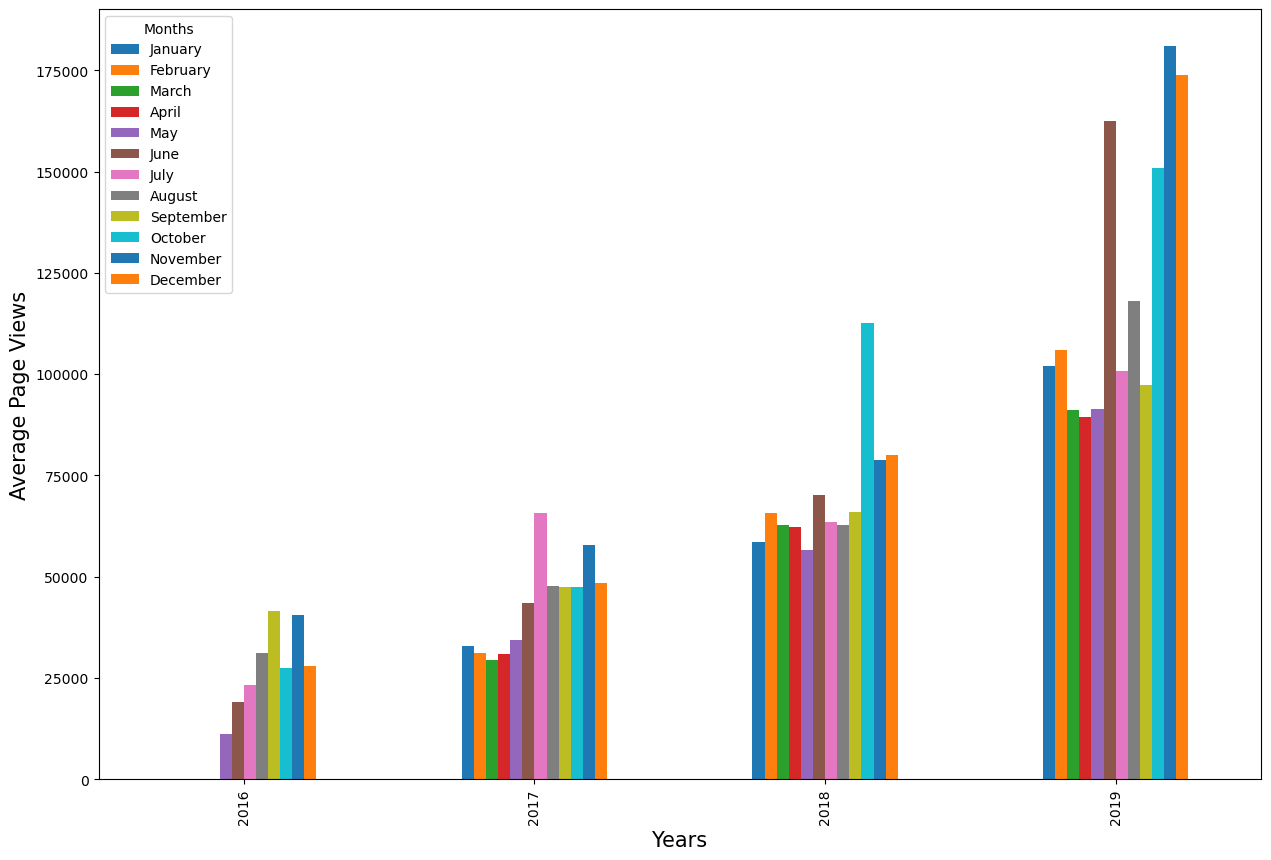

In [40]:
    fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
    plt.xlabel("Years", fontsize = 15)
    plt.ylabel("Average Page Views", fontsize = 15)
    plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [49]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    

    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    fig.set_figwidth(30)
    fig.set_figheight(10)
    
    
    ax1 = sns.boxplot(x = df_box["year"], y = df_box["value"], ax = ax1)
    ax1.set_title("Year-wise Box Plot (Trend)") 
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    df_box["month_num"] = df_box["date"].dt.month
    df_box = df_box.sort_values("month_num")

    ax2 = sns.boxplot(x = df_box["month"], y = df_box["value"], ax = ax2)
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')



    fig.savefig('box_plot.png')

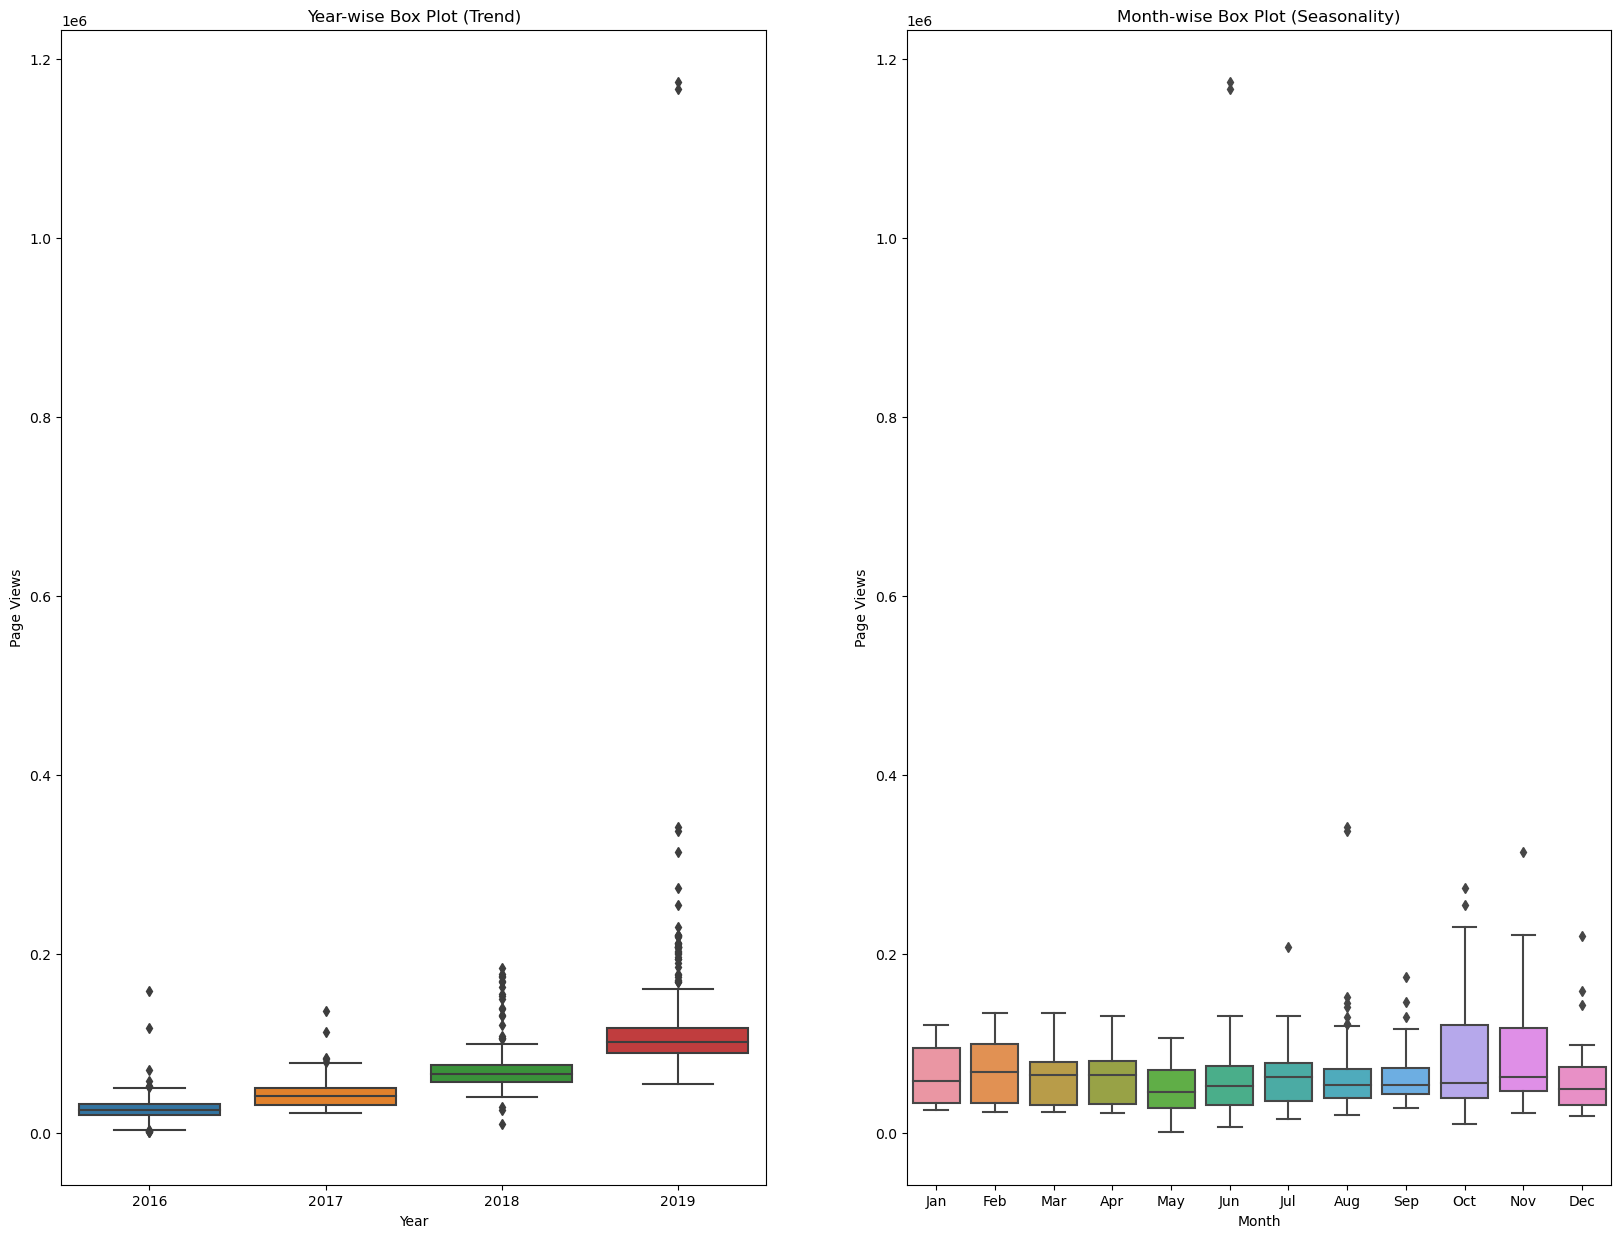

In [42]:
draw_box_plot()